In [23]:
#API KEY Initialization
from dotenv import load_dotenv
load_dotenv()
groq_api_key = os.getenv("GROQ")
langsmith_api_key = os.getenv("LANGSMITH")

In [24]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_PROJECT"] = "LangGraph"

In [31]:
from langchain_groq import ChatGroq

llm = ChatGroq(groq_api_key=groq_api_key, model_name = "gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001E2FD960410>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001E2FD963110>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building ChatBot using LangGraph

In [27]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [12]:
class State(TypedDict):
    '''
    Messages have the type "list", the "add_messages" function
    in the annotation defines how this state key should be updated.
    [In this case, it appends messages to the list, rather than overwriting them]
    '''
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [13]:
graph_builder

In [14]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}

In [15]:
graph_builder.add_node("chatbot", chatbot)

In [19]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [20]:
graph=graph_builder.compile()

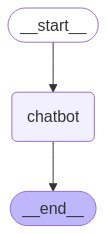

In [22]:
from IPython.display import display, Image

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [33]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit","q"]:
        print("Goodbye")
        break
    for event in graph.stream({'messages':("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistance: ", value['messages'].content)

dict_values([{'messages': AIMessage(content='You can absolutely run prompts in your terminal instead of a popup window! This is a great way to integrate AI interactions into your workflows and automate tasks.\n\nHere\'s how to do it, along with some important considerations:\n\n**Understanding the Basics**\n\n* **Interactivity:**  Traditional popup windows are designed for graphical user interfaces (GUIs). Terminals are text-based environments.  To mimic interactivity, we\'ll use text input and output.\n* **Libraries:** You\'ll need a library that can handle AI model interactions and communicate with your terminal. Popular choices include:\n\n    * **Python:**\n        * `openai`: For interacting with OpenAI models like GPT-3.\n        * `transformers`:  A more general-purpose library for working with various transformer models.\n\n**Example Using Python and OpenAI**\n\n```python\nimport openai\n\nopenai.api_key = "YOUR_API_KEY"  # Replace with your actual API key\n\nwhile True:\n    u